<a href="https://colab.research.google.com/github/Jaykumar-coder/searce/blob/main/asgn1_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

root_path = '/content/drive/MyDrive/searce/asgn1/'
customers_df = pd.read_csv(root_path + 'olist_customers_dataset.csv')
items_df = pd.read_csv(root_path + 'olist_order_items_dataset.csv')
payments_df = pd.read_csv(root_path + 'olist_order_payments_dataset.csv')
orders_df = pd.read_csv(root_path + 'olist_orders_dataset.csv')
products_df = pd.read_csv(root_path + 'olist_products_dataset.csv')
sellers_df = pd.read_csv(root_path + 'olist_sellers_dataset.csv')
categories_df = pd.read_csv(root_path + 'product_category_name_translation.csv')

Mounted at /content/drive


# 1.  Exploring the data base

In [2]:
the_df = {'customers': customers_df,
              'items': items_df, 
              'payments': payments_df, 
              'orders': orders_df, 
              'products': products_df, 
              'sellers': sellers_df, 
              'categories': categories_df}
print("_______________________________________________________________________________________________")
print("Description of the {} dataframes".format(len(the_df)))
print("_______________________________________________________________________________________________")
for i, j in the_df.items():
    print('{} dataframe:      {} rows and {} columns'.format(str(i),j.shape[0],j.shape[1]))
    print(list(j.columns))
    print("")
print("________________________________________________________________________________________________")

_______________________________________________________________________________________________
Description of the 7 dataframes
_______________________________________________________________________________________________
customers dataframe:      99441 rows and 5 columns
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

items dataframe:      112650 rows and 7 columns
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

payments dataframe:      103886 rows and 5 columns
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

orders dataframe:      99441 rows and 8 columns
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

products dataframe:      32951 rows and 9 columns
['product_id', 'product_category_n

I start by removing a few columns that I will not use in my analysis

In [3]:
customers_df=customers_df.drop(columns=[ 'customer_zip_code_prefix'])
items_df=items_df.drop(columns=[ 'shipping_limit_date'])
payments_df=payments_df.drop(columns=['payment_sequential'])
orders_df=orders_df.drop(columns=['order_approved_at'
                                  , 'order_delivered_carrier_date'
                                  , 'order_delivered_customer_date'
                                  , 'order_estimated_delivery_date'])


In [4]:
categories_df.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [5]:
products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


I'm going to use the category name in english. I merge together the product an category dataframe and then drop the Portuguese names

In [6]:
df = pd.merge(products_df, categories_df, on='product_category_name', how='left')
df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [7]:
df=df.drop(columns=["product_category_name"])
del categories_df
# Rename the column
df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

Let's take a look at the different categories of objects and their frequency of purchase

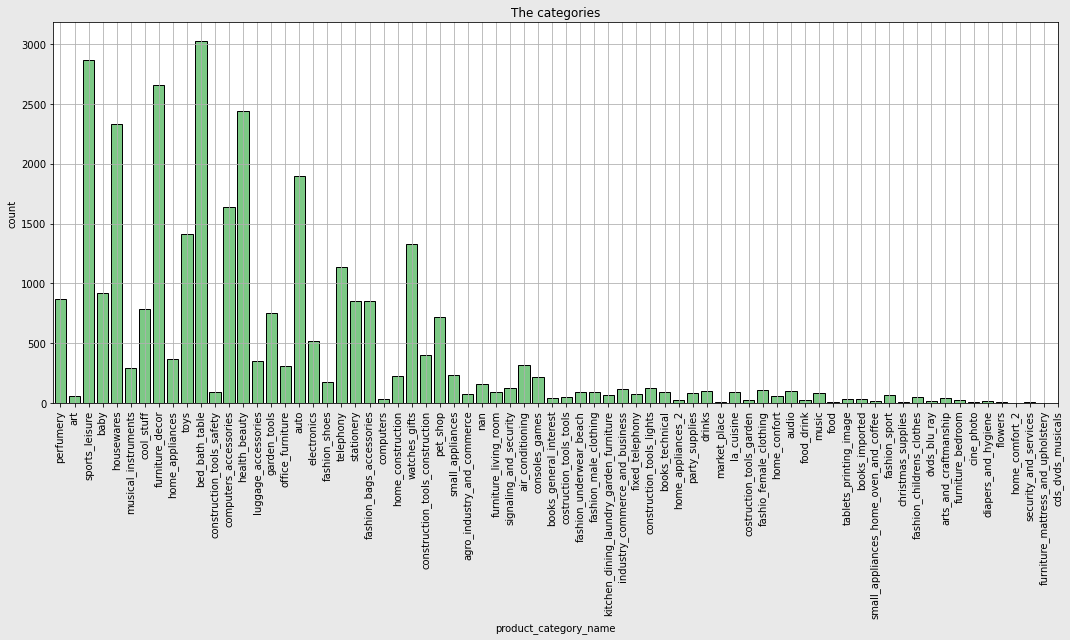

In [8]:
(fig, ax) = plt.subplots(figsize=(18, 7))
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("The categories")
sns.countplot(data=df,x="product_category_name",edgecolor='black',color="#6fd67b")
plt.xticks(range(0,df["product_category_name"].nunique()+1)
           ,df["product_category_name"].unique(),rotation=90)
plt.grid()

In [9]:
#I merge all the orther dataframe together
df2 = pd.merge(orders_df, customers_df, on='customer_id')
df2 = df2.merge(items_df, on='order_id')
df2 = df2.merge(payments_df, on='order_id')
df2 = df2.merge(sellers_df, on='seller_id')
df2.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,18.59,9350,maua,SP


let's take a look on the number of customer, order, products et seller we have

In [10]:
print("We have {} differents customers,{} diffrents orders, {} differents products and {} differents sellers".format(df2["customer_unique_id"].nunique(),
                                                                                                                     df2["order_id"].nunique(),
                                                                                                                    df2["product_id"].nunique(),
                                                                                                                    df2["seller_id"].nunique()))

We have 95419 differents customers,98665 diffrents orders, 32951 differents products and 3095 differents sellers


Now i merge df and df2 on 'product_id'

In [11]:
the_data= df.merge(df2, on='product_id')
the_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  117601 non-null  object 
 1   product_name_lenght         115903 non-null  float64
 2   product_description_lenght  115903 non-null  float64
 3   product_photos_qty          115903 non-null  float64
 4   product_weight_g            117581 non-null  float64
 5   product_length_cm           117581 non-null  float64
 6   product_height_cm           117581 non-null  float64
 7   product_width_cm            117581 non-null  float64
 8   product_category_name       115878 non-null  object 
 9   order_id                    117601 non-null  object 
 10  customer_id                 117601 non-null  object 
 11  order_status                117601 non-null  object 
 12  order_purchase_timestamp    117601 non-null  object 
 13  customer_uniqu

In [12]:

the_data['order_purchase_timestamp'] = pd.to_datetime(the_data['order_purchase_timestamp'])

the_data.head(2)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,order_item_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24 16:16:53,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,debit_card,1,18.30,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31 18:55:36,4b86049cb99e4aa774031daa9cd18f18,rio de janeiro,RJ,1,b561927807645834b59ef0d16ba55a24,248.00,17.99,voucher,1,265.99,2955,sao paulo,SP


In [13]:
print("Orders have been placed between ",min(the_data['order_purchase_timestamp'])," and ",max(the_data['order_purchase_timestamp']))

Orders have been placed between  2016-09-04 21:15:19  and  2018-09-03 09:06:57


I will display the order count as a function of time.

For that I will extract the month and the year for each row and bring them together in another dataframe

In [14]:

time=the_data.loc[:,['order_id']]
time['order_purchase_year'] = pd.to_datetime(the_data['order_purchase_timestamp']).dt.year
time['order_purchase_month'] = pd.to_datetime(the_data['order_purchase_timestamp']).dt.month


In [15]:
time = time.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()

In [16]:
time["period"] =  time["order_purchase_year"].astype(str)  + "/" +time["order_purchase_month"].astype(str)
time.columns=["order_purchase_month","order_purchase_year","Number of order","period"]
time=time.sort_values(by=['order_purchase_year', 'order_purchase_month'])
time.head()

,order_purchase_month,order_purchase_year,Number of order,period
16,9,2016,3,2016/9
19,10,2016,381,2016/10
22,12,2016,1,2016/12
0,1,2017,1005,2017/1
2,2,2017,2062,2017/2


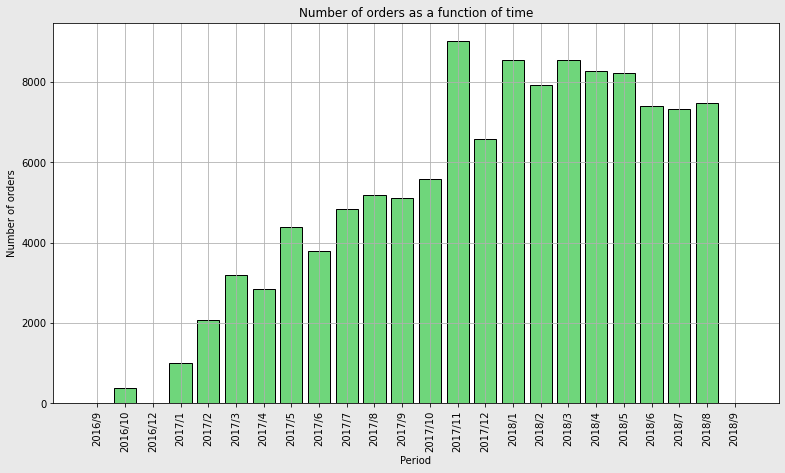

In [17]:
(fig, ax) = plt.subplots(figsize=(13, 7))
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Number of orders as a function of time")
ax=plt.bar(range(0,time["period"].nunique()), time["Number of order"].values
           ,edgecolor='black',color="#6fd67b")
plt.xticks(range(0,time["period"].nunique()),time["period"].unique(),rotation=90)
plt.xlabel("Period")
plt.ylabel("Number of orders")
plt.grid()


We will focus on the orders placed between 2-2018 and 8-2018,because these are the most recent orders, they will better represent the purchasing behavior of current customers

In [18]:
import datetime as dt

data=the_data.loc[ the_data['order_purchase_timestamp']>dt.datetime(2018,2,1,0,0,0,0,None)]
data=data.loc[ data['order_purchase_timestamp']<dt.datetime(2018,8,1,0,0,0,0,None)]


In [19]:

data=data[['product_id','product_category_name', 'price', 'freight_value','payment_type','customer_unique_id',"order_id", 'customer_city', 'customer_state']]



# 2. **Dataset creation: Feature engineering**

The following function is used to extract information about a customer number passed as an argument.

it returns this informations in the form of a list.

In [20]:


def extract_values(cust_id):
    d=data.loc[data["customer_unique_id"]==cust_id]
    cat=list(d["product_category_name"].unique())
    n_order=d["order_id"].nunique()
    tot_price=d["price"].sum()
    tot_frei=d["freight_value"].sum()
    pay_type=list(d["payment_type"].unique())
    if len(pay_type)>0:
        pay_type=pay_type[0]
    else:
        pay_type=np.nan
    state=d["customer_state"].unique()
    if len(state)==1:
        state=state[0]
    else:
        state=np.nan
    row=[cust_id,cat,n_order,tot_price,tot_frei,pay_type,state]
    
    return row
    
    

This function encodes categorical variables to ultimately obtain a dataframe of numeric variables

In [21]:
def get_dataset(customer_list):
    df= pd.DataFrame(columns=["customer_id","category","n_order","total_price","total_freight_value","payement_type","costumer_state"])
    print("We are going to create a {} rows dataset.".format(len(customer_list)))
    #Extract data
    for i, cust in enumerate(customer_list):
        x= extract_values(cust)
        df.loc[i+1]=x
    
    print("Data extracted")
    #encode payment_type and costumer_state
    df2=pd.get_dummies(data=df, columns=["payement_type","costumer_state"])
    
    #Encode category
    cat=df2["category"].sum()
    cat=(pd.Series(cat).unique())     
    for c in cat:
        def create_var(liste):
            if c in liste:
                return 1
            else:
                return 0 
        df2["cat"+str(c)]=df2["category"].apply(create_var)
    
    print("Category encoded")
         
   
    
    #Drop useless columns
    df2=df2.drop(columns=[ 'category'])
    print("the final dataset has {} rows and {} columns .".format(df2.shape[0],df2.shape[1]))
    return df2


We extract a sample of customers and create the dataset.

In [22]:
n_rows=6000
customer_id=list(data["customer_unique_id"].unique())
sample=list(np.random.choice(customer_id, n_rows))
donne=get_dataset(sample)
donne.head(2)

We are going to create a 6000 rows dataset.
Data extracted
Category encoded
the final dataset has 6000 rows and 101 columns .


,customer_id,n_order,total_price,total_freight_value,payement_type_boleto,payement_type_credit_card,payement_type_debit_card,payement_type_voucher,costumer_state_AC,costumer_state_AL,costumer_state_AM,costumer_state_AP,costumer_state_BA,costumer_state_CE,costumer_state_DF,costumer_state_ES,costumer_state_GO,costumer_state_MA,costumer_state_MG,costumer_state_MS,costumer_state_MT,costumer_state_PA,costumer_state_PB,costumer_state_PE,costumer_state_PI,costumer_state_PR,costumer_state_RJ,costumer_state_RN,costumer_state_RO,costumer_state_RR,costumer_state_RS,costumer_state_SC,costumer_state_SE,costumer_state_SP,costumer_state_TO,catcomputers_accessories,catbed_bath_table,catauto,cathealth_beauty,catdrinks,...,catbooks_general_interest,catfixed_telephony,catperfumery,catconstruction_tools_lights,catbooks_technical,catnan,catluggage_accessories,catcostruction_tools_garden,catsignaling_and_security,cathome_construction,cathome_confort,catmarket_place,catagro_industry_and_commerce,catfurniture_living_room,catair_conditioning,catart,catcine_photo,catmusical_instruments,catconsoles_games,catfood_drink,cathome_appliances_2,cataudio,catchristmas_supplies,catindustry_commerce_and_business,catcomputers,catfashion_male_clothing,catcostruction_tools_tools,catkitchen_dining_laundry_garden_furniture,catbooks_imported,catflowers,catfashion_childrens_clothes,catmusic,catdvds_blu_ray,catsmall_appliances_home_oven_and_coffee,catfashion_underwear_beach,catarts_and_craftmanship,cattablets_printing_image,catfurniture_mattress_and_upholstery,cathome_comfort_2,catdiapers_and_hygiene
1,d5ccfa0a3c2abc8d9c6781a15b647302,1,309.00,21.13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,494cc27e7471c75cbceacfcd6739696d,1,21.99,18.23,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**In view of the number of columns we will apply a dimensional reduction with PCA**

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def display_scree_plot(pca):
#Function display the cumulative variance ratio
    scree = pca.explained_variance_ratio_*100
    fig=plt.figure(figsize=[16,5])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.bar(np.arange(len(scree))+1, scree,color="#6fd67b",edgecolor='black')
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='+')
    plt.xlabel("Rank of the principal component")
    plt.ylabel("Percent of inertia")
    plt.title("cumulative variance ratio")
    plt.grid()
    plt.show(block=False)

In [24]:
X=donne.drop(columns=["customer_id"])
X=X.dropna() # PCA don't take nans


#On Standardise les données
scaler=StandardScaler() 
Xs=scaler.fit_transform(X)

# On applique la PCA
pca = PCA(n_components=min(X.shape[0],X.shape[1]))
d=pca.fit_transform(Xs)

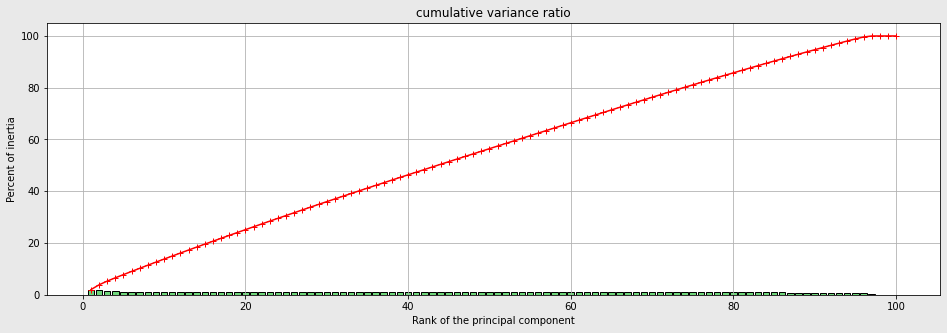

In [25]:
display_scree_plot(pca)

Choose the number of principal component to take

In [26]:
scree = pca.explained_variance_ratio_
nbr_pca=0
N=110
for i in range(N):
    a = scree.cumsum()[i]
    if a >= 0.80:
        print("{} principal components explain at least 80% of the total variance".format(i))
        print("Exact value of variance explained: {}%".format(round(a*100,2)))
        nbr_pca=i
        break
pca = PCA(n_components=nbr_pca)
d=pca.fit_transform(Xs)

73 principal components explain at least 80% of the total variance
Exact value of variance explained: 80.14%


In [27]:
data_pca=pd.DataFrame(d)
col=["pca "+ str(n+1) for n in data_pca.columns]
data_pca.columns=col
data_pca.head()


,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8,pca 9,pca 10,pca 11,pca 12,pca 13,pca 14,pca 15,pca 16,pca 17,pca 18,pca 19,pca 20,pca 21,pca 22,pca 23,pca 24,pca 25,pca 26,pca 27,pca 28,pca 29,pca 30,pca 31,pca 32,pca 33,pca 34,pca 35,pca 36,pca 37,pca 38,pca 39,pca 40,pca 41,pca 42,pca 43,pca 44,pca 45,pca 46,pca 47,pca 48,pca 49,pca 50,pca 51,pca 52,pca 53,pca 54,pca 55,pca 56,pca 57,pca 58,pca 59,pca 60,pca 61,pca 62,pca 63,pca 64,pca 65,pca 66,pca 67,pca 68,pca 69,pca 70,pca 71,pca 72,pca 73
0,-0.584820,0.625467,-0.948932,-0.822949,-1.058727,-0.139219,1.019096,0.388015,0.860377,-0.748445,-0.641996,0.001303,-0.013410,-0.144011,0.073018,0.561936,-0.188184,0.154491,1.354445,-0.205460,0.283247,0.197517,0.207122,-0.897783,0.882283,-0.237598,-0.917128,-0.590405,0.260196,-0.623517,0.970640,-0.241654,-0.061478,-0.064528,0.153106,0.019964,-0.290685,0.720507,0.329490,0.039403,0.106842,-0.037735,0.498092,-0.159571,-0.191257,0.205594,-0.002785,-0.120285,0.166878,-0.000024,-0.128106,-0.337992,-0.260953,0.280145,-0.006912,-0.034223,0.121926,-0.088046,-0.656719,-0.044872,0.099951,-0.265357,-0.571263,-0.149065,-0.282286,-0.189976,0.052437,0.860594,-0.596584,-0.693545,-0.613964,-0.216577,0.006998
1,-0.718573,0.046665,-0.684851,-0.541625,0.087773,0.413534,-0.567835,0.045754,0.086221,-0.068360,1.026679,0.574353,-1.135856,-1.253264,-0.135616,0.349652,-2.170131,1.628865,1.650786,0.682147,-1.019660,-1.544721,-0.414035,-0.072254,-1.778510,-1.070720,1.518073,-1.048530,0.407568,0.371475,0.008402,-0.219150,0.386910,-0.249895,1.477285,-1.058131,0.777953,0.332670,-0.143295,0.031569,0.870018,-0.075216,-0.324160,-0.385475,-0.093348,-0.037157,0.192377,-0.141406,-0.102074,0.058660,0.010809,0.134904,0.505162,-0.120281,0.058254,1.420458,0.026050,-0.205930,0.297409,0.178025,-0.318084,-0.123376,-0.264644,-1.295572,-0.379870,0.459789,0.233592,-0.186951,1.516549,0.958864,1.004853,-0.278716,-1.860305
2,-0.720954,0.176512,-1.694038,0.725636,0.110294,0.656021,1.353682,-0.550185,-0.892724,-0.018219,-0.467902,0.036006,0.432193,-0.567750,0.162082,-0.074914,0.167538,-1.215003,-0.775214,0.200155,0.993190,0.366135,-0.569033,0.211979,-0.577098,0.774261,1.169921,0.466255,1.846588,0.654194,-0.716890,-0.232735,0.524157,-0.447369,0.134378,-0.169910,0.103570,0.493039,-1.187256,-0.322986,-0.220415,0.243505,0.045984,-0.223694,0.123686,0.336485,-0.156980,-0.389834,-0.352218,0.313370,0.315791,0.066339,-0.247343,-0.094694,0.361972,-0.220710,0.180027,-0.395097,-0.408012,0.203041,0.358793,1.128777,0.476720,0.209179,0.172244,-0.006557,0.084600,-0.063832,0.547599,-0.400812,-0.951608,0.421231,-0.299821
3,-0.763733,-0.607578,1.340018,0.926630,0.217072,-0.064938,-0.141046,0.911530,-0.174638,-0.778009,0.787801,0.614455,0.515605,-0.588441,-0.374935,-0.824034,-0.143428,0.234276,-0.267140,0.216320,-0.120891,-0.278262,-0.529793,-0.228631,-0.052691,-0.166616,-0.154655,0.236313,-0.152430,-0.603848,-0.274279,0.747609,-0.536760,0.516311,-0.035043,0.383518,-0.396319,0.146367,-0.133647,0.090867,0.028443,0.024725,0.249076,-0.019421,0.161668,-0.132713,0.051842,0.039464,-0.034718,0.021007,-0.000544,0.067279,-0.134137,0.090380,-0.044390,0.011306,-0.105011,0.148614,0.027057,-0.184365,0.289119,-0.067100,0.036853,0.121000,0.166610,-0.294322,-0.029319,0.033893,-0.026536,-0.372720,-0.068014,0.090455,-0.364867
4,-0.680525,0.401631,-0.642769,-0.499067,-0.954603,-0.681071,0.112731,1.369228,0.563369,-1.073330,1.216306,0.620288,0.734706,-0.414904,-0.283656,-0.849426,-0.145088,0.380644,0.004793,0.297164,0.105150,-0.217676,-0.470444,-0.474119,-0.224498,-0.137584,-0.400705,0.317869,-0.023236,-0.760399,-0.307992,0.620897,-0.590839,0.480248,-0.184618,0.559098,-0.385716,0.310309,-0.037746,0.062388,0.149449,0.136686,0.323587,0.052032,0.090691,-0.211374,0.055756,0.032602,-0.022310,-0.043449,0.015203,-0.042952,-0.126875,0.226093,-0.203146,0.120312,0.050261,0.046122,-0.153910,0.044507,-0.165105,-0.341347,-0.152668,0.003030,0.159604,-0.506000,-0.249649,0.559936,0.132692,-0.712685,-0.588472,0.204636,-0.182493


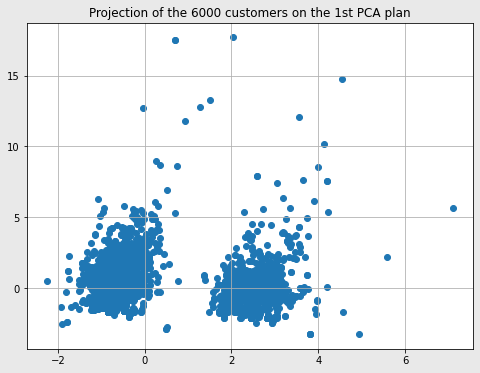

In [28]:
fig=plt.figure(figsize=[8,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Projection of the {} customers on the 1st PCA plan".format(data_pca.shape[0]))
plt.scatter(data=data_pca,x="pca 1",y="pca 2")
plt.grid()

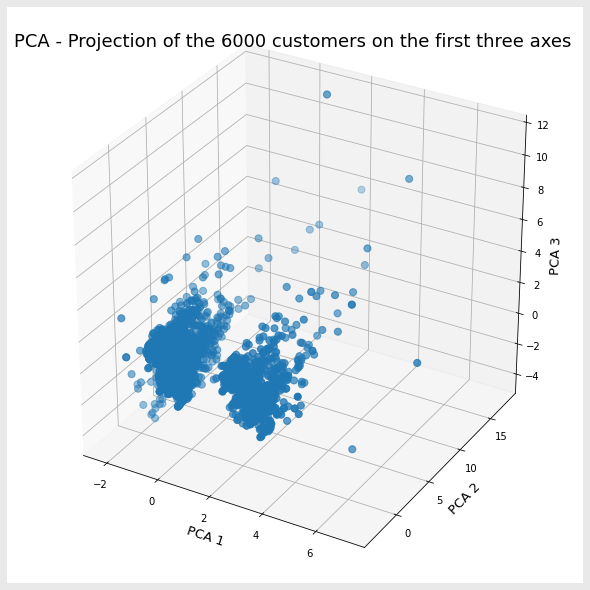

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import sys

fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
ax = Axes3D(fig)
plt.title("PCA - Projection of the {} customers on the first three axes ".format(data_pca.shape[0]),fontsize=18)

ax.set_xlabel ('PCA 1 ',fontsize=13)
ax.set_ylabel ('PCA 2 ',fontsize=13)
ax.set_zlabel ('PCA 3 ',fontsize=13)
ax.scatter(data_pca['pca 1'], data_pca['pca 2'],data_pca['pca 3'], s=50)


In [30]:
data_pca["customer_id"]=donne["customer_id"].values
data_pca.head(1)


,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8,pca 9,pca 10,pca 11,pca 12,pca 13,pca 14,pca 15,pca 16,pca 17,pca 18,pca 19,pca 20,pca 21,pca 22,pca 23,pca 24,pca 25,pca 26,pca 27,pca 28,pca 29,pca 30,pca 31,pca 32,pca 33,pca 34,pca 35,pca 36,pca 37,pca 38,pca 39,pca 40,pca 41,pca 42,pca 43,pca 44,pca 45,pca 46,pca 47,pca 48,pca 49,pca 50,pca 51,pca 52,pca 53,pca 54,pca 55,pca 56,pca 57,pca 58,pca 59,pca 60,pca 61,pca 62,pca 63,pca 64,pca 65,pca 66,pca 67,pca 68,pca 69,pca 70,pca 71,pca 72,pca 73,customer_id
0,-0.58482,0.625467,-0.948932,-0.822949,-1.058727,-0.139219,1.019096,0.388015,0.860377,-0.748445,-0.641996,0.001303,-0.01341,-0.144011,0.073018,0.561936,-0.188184,0.154491,1.354445,-0.20546,0.283247,0.197517,0.207122,-0.897783,0.882283,-0.237598,-0.917128,-0.590405,0.260196,-0.623517,0.97064,-0.241654,-0.061478,-0.064528,0.153106,0.019964,-0.290685,0.720507,0.32949,0.039403,0.106842,-0.037735,0.498092,-0.159571,-0.191257,0.205594,-0.002785,-0.120285,0.166878,-0.000024,-0.128106,-0.337992,-0.260953,0.280145,-0.006912,-0.034223,0.121926,-0.088046,-0.656719,-0.044872,0.099951,-0.265357,-0.571263,-0.149065,-0.282286,-0.189976,0.052437,0.860594,-0.596584,-0.693545,-0.613964,-0.216577,0.006998,d5ccfa0a3c2abc8d9c6781a15b647302


In [31]:


X=data_pca.drop(columns=["customer_id"]).copy()
scaler=StandardScaler() 
Xs=scaler.fit_transform(X)



# 3. kmeans clustering  

We choose the number of clusters to generate by relying on the silhouette coefficient

In [32]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

n_clusters=range(2,15)
scores=[]
for n in n_clusters:
    
    kmeans = KMeans(n_clusters=n, random_state=0).fit(Xs)
    labs=kmeans.labels_
    score=silhouette_score(Xs,labs)
    scores.append(score)

No handles with labels found to put in legend.


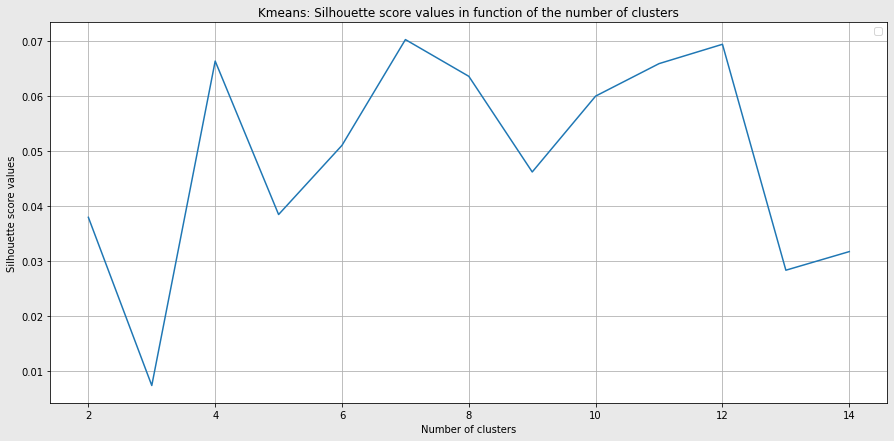

In [33]:
fig=plt.figure(figsize=[15,7])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Kmeans: Silhouette score values in function of the number of clusters")

plt.plot(n_clusters,scores)
plt.ylabel("Silhouette score values")
plt.xlabel("Number of clusters")
plt.grid()
plt.legend()

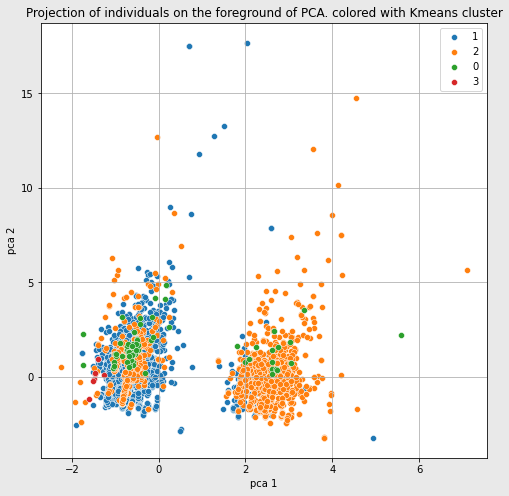

In [34]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Xs)
labs=kmeans.labels_

test=data_pca.loc[:,["pca 1","pca 2"]]
test["cluster kmeans"]=labs
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Projection of individuals on the foreground of PCA. colored with Kmeans cluster")
for clu in test["cluster kmeans"].unique():
    t=test.loc[test["cluster kmeans"]==clu]
    sns.scatterplot(x=t['pca 1'],y= t['pca 2'],label=clu)
plt.legend()
plt.grid()
plt.show()

# 4. Cluster Analysis

First, let's look at the size of each cluster

([<matplotlib.axis.XTick at 0x7fb7b874c8d0>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '0'), Text(0, 0, '3')])

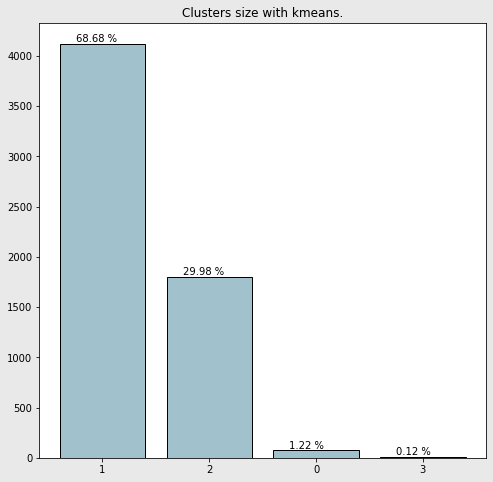

In [35]:
cluster_size={}
for i in labs:
    if i not in cluster_size:
        cluster_size[i]=1
    else:
        cluster_size[i]+=1

fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Clusters size with kmeans.") 
plt.bar(range(0,len(cluster_size)),cluster_size.values(),color="#a1c2cc",edgecolor='black')
for i,num in enumerate(cluster_size.keys()):
    height=cluster_size[num]+20
    x=i-0.25
    pourcent=cluster_size[num]/labs.shape[0]*100
    plt.text(x,height,"{} % ".format(round(pourcent,2)))
plt.xticks(range(0,len(cluster_size)),cluster_size.keys())

We have 2 massives clusters, then 2 smaller in size 

In [36]:
donne["N° cluster"]=labs



I extract the list of all the clients of each cluster
 And reports the cluster for each client in the raw data dataframe

In [37]:
df=data.loc[data["customer_unique_id"].isin(sample)]
dic_customer={}
for i in cluster_size.keys():
    d=donne.loc[donne["N° cluster"]==i]
    dic_customer[i]=list(d["customer_id"].unique())

def give_cluster(num):
    for i in dic_customer.keys():
        if num in dic_customer[i]:
            return i
    
                         


In [38]:
df["N° cluster"]=df["customer_unique_id"].apply(give_cluster)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df.head()

,product_id,product_category_name,price,freight_value,payment_type,customer_unique_id,order_id,customer_city,customer_state,N° cluster
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,79.80,7.82,credit_card,f63805d9c7edb84d92413af34b86a39c,01f66e58769f84129811d43eefd187fb,sao paulo,SP,1
23,14aa47b7fe5c25522b47b4b29c98dcb9,bed_bath_table,71.99,12.00,credit_card,f66a8a0a66a5bfba2b2a3bbb4fe89b58,34ded2049fc8446ced02a6bd3dcbdab3,cotia,SP,1
24,14aa47b7fe5c25522b47b4b29c98dcb9,bed_bath_table,71.99,12.00,credit_card,f66a8a0a66a5bfba2b2a3bbb4fe89b58,34ded2049fc8446ced02a6bd3dcbdab3,cotia,SP,1
29,eb31436580a610f202c859463d8c7415,construction_tools_safety,226.18,19.68,credit_card,b4440223bd5fc71d0e9e491dfc2a53a0,43dad3b15826adef6cba40d7aab778d7,blumenau,SC,1
54,d03bd02af9fff4b98f1c972315e5e9ef,furniture_decor,79.90,12.70,credit_card,334fed5abcee3aa96c13f1432703e1fd,4ed7a5d31f58c9c3b20a61e3927db6d9,sao paulo,SP,1



The following functions are used to extract a **dictionary of the most frequent classes**, with the associated percentage, for a **cluster number** and a **variable** passed as an argument

In [40]:
def extract_pourcent(df,list_top3,var):
    dict_freq={}
    N=df.shape[0]
    for i in list_top3:
        d=df.loc[df[var]==i]
        n=d.shape[0]/N*100
        dict_freq[i]=round(n,1)
    return dict_freq

def most_pop(variable,cluster):
    d=df.loc[df["N° cluster"]==cluster]
    cat_list=list(d[variable].values)
    cat_counter = {}
    for word in cat_list:
        if word in cat_counter:
            cat_counter[word] += 1
        else:
            cat_counter[word] = 1

    popular_cat = sorted(cat_counter, key = cat_counter.get, reverse = True)
    top_4 = popular_cat[:4]
    top_4=extract_pourcent(d,top_4,variable)
    return top_4

In [41]:
print(df["N° cluster"].unique())

[1 2 0 3]



The following function allows you to **display the 4 most frequent classes**, (for 3 indicators: product categories, state of residence and type of payment) for a **cluster number** passed as an argument.

In [42]:
def cluster_analysis(n_cluster):
    the_cluster=n_cluster
    popular_cat=most_pop("product_category_name",the_cluster)
    popular_state=most_pop("customer_state",the_cluster)
    popular_payment_type=most_pop("payment_type",the_cluster)

    fig=plt.figure(1,figsize=[19,5])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)

    plt.suptitle("Clusters N° {}: {} customers.".format(the_cluster,cluster_size[the_cluster]),size=15)
    plt.subplot(1,3,1)
    plt.title("Top of product category")
    plt.bar(range(0,len(popular_cat)),popular_cat.values(),color="#a1c2cc",edgecolor='black')
    plt.xticks(range(0,len(popular_cat)),popular_cat.keys(),rotation=90)
    plt.ylabel("Percentage")

    plt.subplot(1,3,2)
    plt.title("Top of State of residence")
    plt.bar(range(0,len(popular_state)),popular_state.values(),color="#a1c2cc",edgecolor='black')
    plt.xticks(range(0,len(popular_state)),popular_state.keys())

    plt.subplot(1,3,3)
    plt.title("Top of State of residence")
    plt.bar(range(0,len(popular_payment_type)),popular_payment_type.values(),color="#a1c2cc",edgecolor='black')
    plt.xticks(range(0,len(popular_payment_type)),popular_payment_type.keys(),rotation=90)
    plt.show()

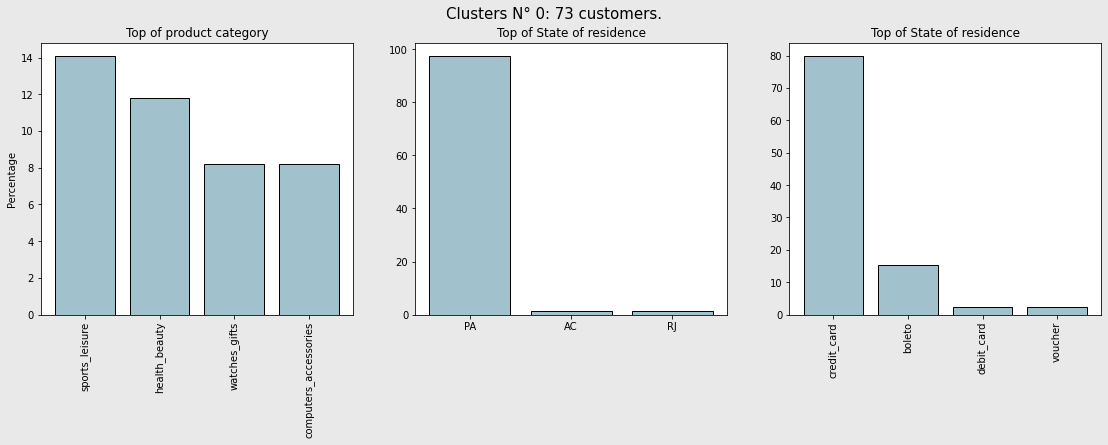

In [43]:
cluster_analysis(0)

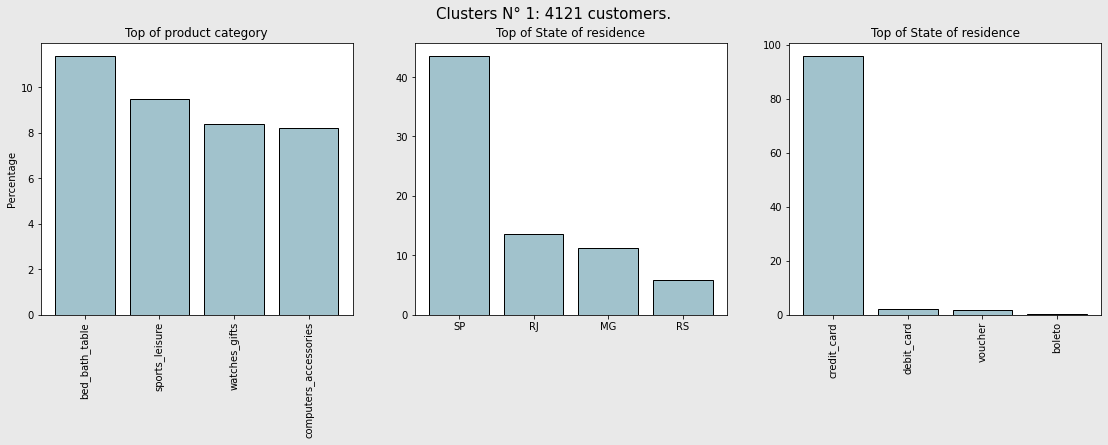

In [44]:
cluster_analysis(1)

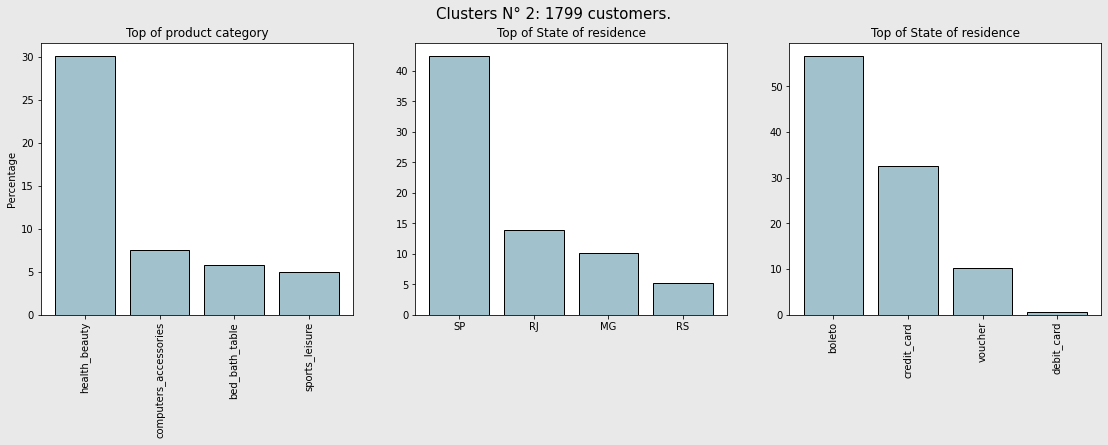

In [45]:
cluster_analysis(2)

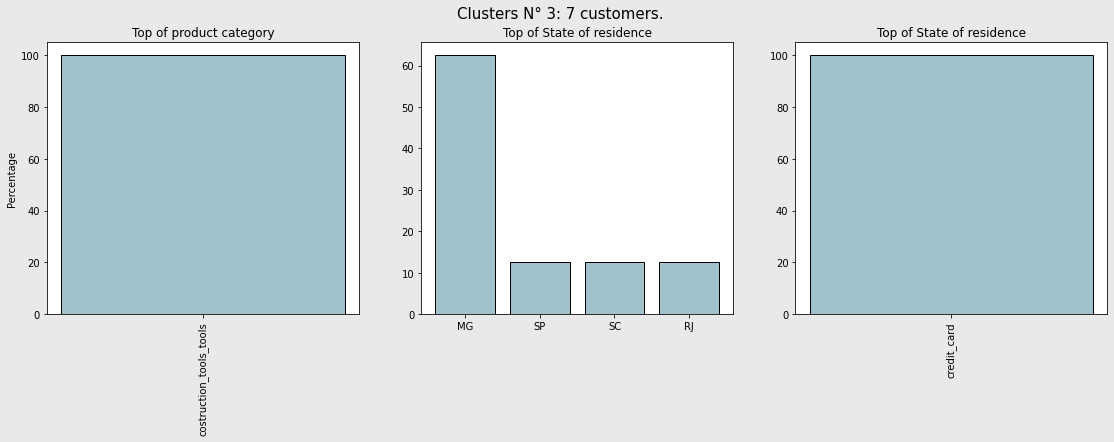

In [46]:
cluster_analysis(3)

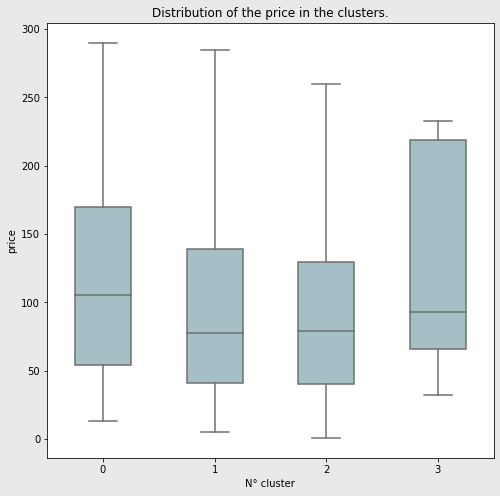

In [47]:
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the price in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="price",width=0.5,showfliers=False,color="#a1c2cc")

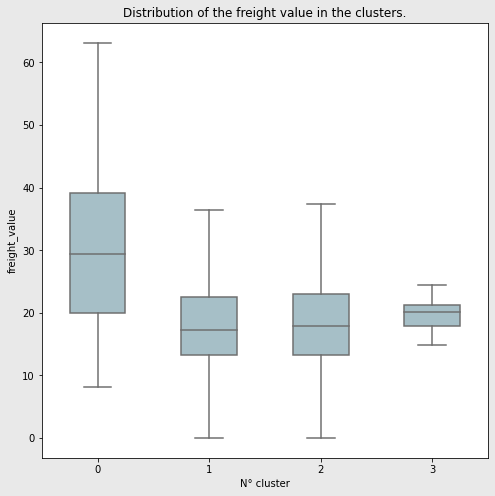

In [48]:
fig=plt.figure(figsize=[8,8])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Distribution of the freight value in the clusters.")
sns.boxplot(data=df,x="N° cluster",y="freight_value",width=0.5,showfliers=False,color="#a1c2cc")

# **Conclusion:**
> Individuals from different clusters are distinguished mainly by the type of product purchased. 
